### Problem Statement

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each 
passenger the data include information on their mileage history and on different ways they accrued or spent miles in the 
last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID


Balance--Number of miles eligible for award travel


Qual_mile--Number of miles counted as qualifying for Topflight status


cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:


1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000


Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months


Bonus_trans--Number of non-flight bonus transactions in the past 12 months


Flight_miles_12mo--Number of flight miles in the past 12 months


Flight_trans_12--Number of flight transactions in the past 12 months


Days_since_enrolled--Number of days since enrolled in flier program


Award--whether that person had award flight (free flight) or not

In [8]:
# Importing the rrequired libraries

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set

df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Getting descriptive statistics

df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
# Getting data set information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df['Award?'].value_counts() 

0    2518
1    1481
Name: Award?, dtype: int64

The feature 'ID#' is not useful for the determining the output variable.

In [6]:
df = df.drop( 'ID#', axis = 1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
# Performing feature scaling

df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


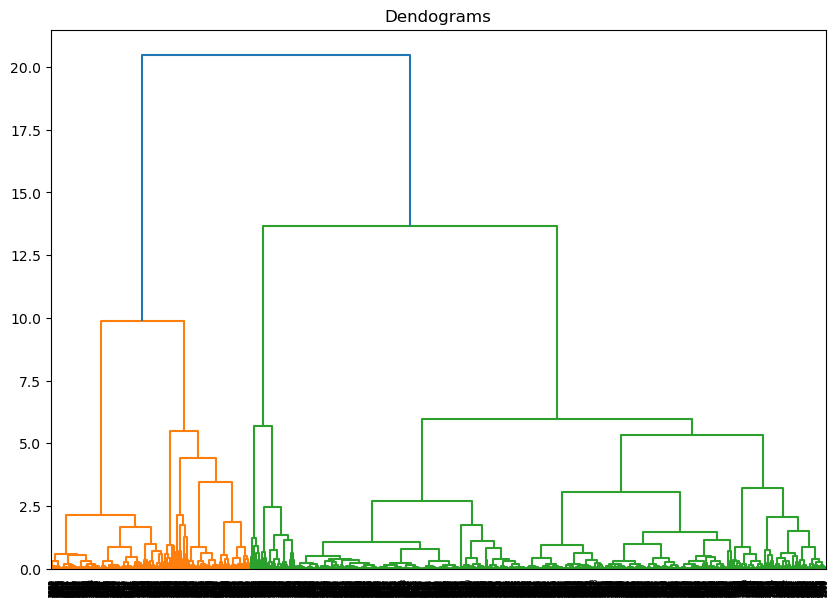

In [12]:
plt.figure(figsize = (10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward' ))

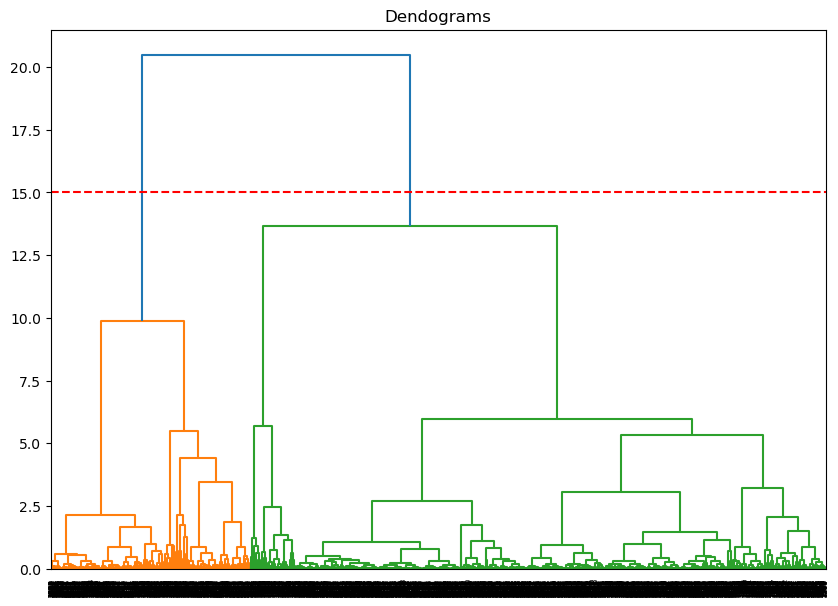

In [14]:
plt.figure(figsize = (10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward' ))
plt.axhline(y=15, color = 'r', linestyle = '--')

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [19]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(df_scaled)
        silt_score= silhouette_score(df_scaled, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.5139372024930298
Silhouette score with clusters 2 and linkage complete is 0.5414238101631427
Silhouette score with clusters 2 and linkage average is 0.619907535859172
Silhouette score with clusters 2 and linkage single is 0.641480759594723
Silhouette score with clusters 3 and linkage ward is 0.5501327844139562
Silhouette score with clusters 3 and linkage complete is 0.5757037622831419
Silhouette score with clusters 3 and linkage average is 0.602326406483986
Silhouette score with clusters 3 and linkage single is 0.498080813728262
Silhouette score with clusters 4 and linkage ward is 0.4539260759331337
Silhouette score with clusters 4 and linkage complete is 0.532235641158862
Silhouette score with clusters 4 and linkage average is 0.5734105132825342
Silhouette score with clusters 4 and linkage single is 0.4595788088569986
Silhouette score with clusters 5 and linkage ward is 0.3102633424399014
Silhouette score with clusters 5 and linka

Selecting number of clusters 2 and linkage single for the highest Silhouette score 0.641480759594723

In [23]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
Labels = cluster.fit_predict(df_scaled)
df1 = df_scaled.copy()
df1['Clusters'] = Labels
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,1
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


<AxesSubplot:xlabel='Clusters', ylabel='count'>

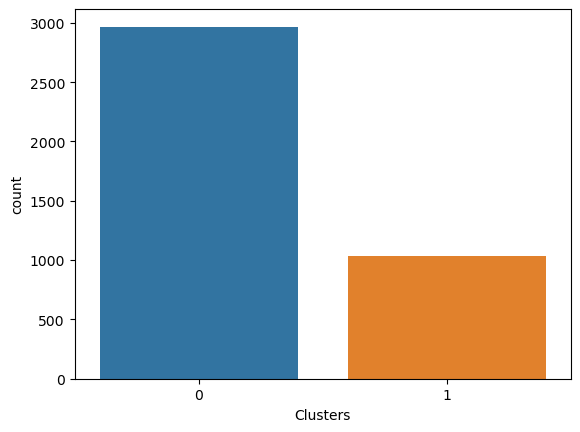

In [24]:
sns.countplot(x="Clusters", data=df1)

In [28]:
# Applying PCA
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [27]:
pca = PCA()
pca_fitted=pca.fit_transform(df_scaled)

In [29]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(pca_fitted)
        silt_score= silhouette_score(pca_fitted, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.5139372024930297
Silhouette score with clusters 2 and linkage complete is 0.5414238101631424
Silhouette score with clusters 2 and linkage average is 0.6199075358591718
Silhouette score with clusters 2 and linkage single is 0.6414807595947227
Silhouette score with clusters 3 and linkage ward is 0.550132784413956
Silhouette score with clusters 3 and linkage complete is 0.5757037622831417
Silhouette score with clusters 3 and linkage average is 0.6023264064839858
Silhouette score with clusters 3 and linkage single is 0.498080813728262
Silhouette score with clusters 4 and linkage ward is 0.45392607593313355
Silhouette score with clusters 4 and linkage complete is 0.5322356411588619
Silhouette score with clusters 4 and linkage average is 0.5734105132825341
Silhouette score with clusters 4 and linkage single is 0.45957880885699864
Silhouette score with clusters 5 and linkage ward is 0.310263342439901
Silhouette score with clusters 5 and l

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, linkage= 'ward')
labels= cluster.fit_predict(df_scaled)
df2= df_scaled.copy()
df2["clusters"]= labels
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,1
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,1
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,1
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,1
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,1
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,1
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,1


<AxesSubplot:xlabel='clusters', ylabel='count'>

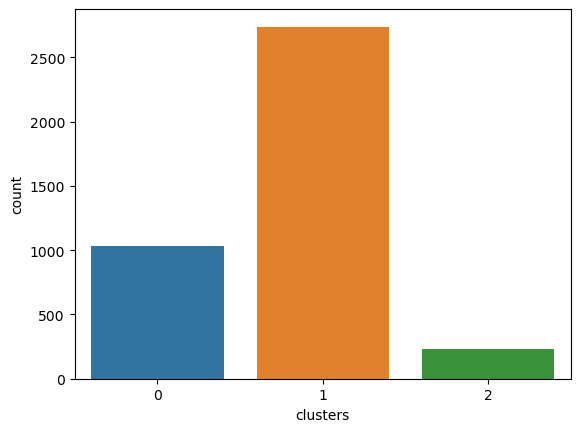

In [46]:
sns.countplot(x="clusters", data=df2)